### Importación de datos



In [ ]:
!pip install contextily matplotlib scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 78.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [ ]:
# cambiar la fecha de compra a formato fecha con datetime
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1['Fecha de Compra'] = pd.to_datetime(tienda1['Fecha de Compra'],format='%d/%m/%Y', errors='coerce')
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'],format='%d/%m/%Y', errors='coerce')
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'],format='%d/%m/%Y', errors='coerce')
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'],format='%d/%m/%Y', errors='coerce')

tienda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                2359 non-null   object        
 1   Categoría del Producto  2359 non-null   object        
 2   Precio                  2359 non-null   float64       
 3   Costo de envío          2359 non-null   float64       
 4   Fecha de Compra         2359 non-null   datetime64[ns]
 5   Vendedor                2359 non-null   object        
 6   Lugar de Compra         2359 non-null   object        
 7   Calificación            2359 non-null   int64         
 8   Método de pago          2359 non-null   object        
 9   Cantidad de cuotas      2359 non-null   int64         
 10  lat                     2359 non-null   float64       
 11  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje

In [ ]:
#Listado, nombre columnas:
lista_columnas = tienda1.columns.tolist()

print('Las columnas del df son:')
print(lista_columnas)

Las columnas del df son:
['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']


Variables:

-Producto y Categoría: Artículos vendidos y sus calificaciones.

-Precio y Envío: Valores de venta y costos asociados.

-Fecha y ubicación de compra: Información temporal y geográfica.

-Evaluación de compra: Comentarios de clientes.

-Tipo de Pago y Cuotas: Métodos utilizados por los clientes.

-Coordenadas Geográficas: Ubicación de las transacciones.

#1. Análisis de facturación



In [ ]:
# Ingresos acumulados totales por tienda:
print('Ingreso total por tienda:')
ingreso_tienda1 = tienda1['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

print(f'Ingreso Tienda 1: ${ingreso_tienda1:,.0f}')
print(f'Ingreso Tienda 2: ${ingreso_tienda2:,.0f}')
print(f'Ingreso Tienda 3: ${ingreso_tienda3:,.0f}')
print(f'Ingreso Tienda 4: ${ingreso_tienda4:,.0f}')


Ingreso total por tienda:
Ingreso Tienda 1: $1,150,880,400
Ingreso Tienda 2: $1,116,343,500
Ingreso Tienda 3: $1,098,019,600
Ingreso Tienda 4: $1,038,375,700


# 2. Ventas por categoría

Debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [ ]:
# Construcción del código para Tienda1:
# opcion1 (con size)
productos_categoria = tienda1.groupby('Categoría del Producto').size()

print("\nCantidad de productos vendidos por categoría (usando .size()):")
print(productos_categoria)
print("-" * 30)


Cantidad de productos vendidos por categoría (usando .size()):
Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
dtype: int64
------------------------------


In [ ]:
#Opción 2: Usando .groupby() y .count() ---
categoria_count = tienda1.groupby('Categoría del Producto')['Producto'].count() # O cualquier otra columna que no tenga valores nulos para contar las filas

print("\nCantidad de productos vendidos por categoría en Tienda 1:")
print(categoria_count)
print("-" * 30)


Cantidad de productos vendidos por categoría en Tienda 1:
Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
Name: Producto, dtype: int64
------------------------------


In [ ]:
# Crea un DataFrame de las tiendas, para utilizar en los ciclos for:
dataframes_tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

In [ ]:
# PARA TODAS LAS TIENDAS:
print("--- Cantidad de productos vendidos por categoría en cada tienda ---")

for nombre_tienda, df_tienda in dataframes_tiendas.items():
    print(f"\nResultados para {nombre_tienda}:")
    if 'Categoría del Producto' in df_tienda.columns:
        ventas_por_categoria = df_tienda.groupby('Categoría del Producto').size().sort_values(ascending=False)
        print(ventas_por_categoria)
    else:
        print(f"La columna 'Categoría del Producto' no se encontró en {nombre_tienda}.")
    print("-" * 40)

--- Cantidad de productos vendidos por categoría en cada tienda ---

Resultados para Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64
----------------------------------------

Resultados para Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64
----------------------------------------

Resultados para Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                 

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [ ]:
# PARA LA TIENDA 1

calificacion_producto = tienda1.groupby('Producto')['Calificación'].mean()
ranking_calificacion = calificacion_producto.sort_values(ascending=False)

print("\nProductos mejor calificados (ordenados de mayor a menor):")
print(ranking_calificacion.round(2))
# Satisfaccion global tienda
satisfaccion_global = tienda1['Calificación'].mean()
print('\nSatisfacción global para la tienda1: ',satisfaccion_global.round(2))


Productos mejor calificados (ordenados de mayor a menor):
Producto
Ajedrez de madera              4.43
Iniciando en programación      4.29
Cubertería                     4.23
Smartwatch                     4.21
Batería                        4.19
Impresora                      4.17
Tablet ABXY                    4.14
Carrito de control remoto      4.13
Estufa                         4.13
Lavadora de ropa               4.13
Cama box                       4.11
Kit de bancas                  4.11
Ciencia de datos con Python    4.10
Bloques de construcción        4.09
Guitarra eléctrica             4.09
Asistente virtual              4.08
Sillón                         4.07
Balón de voleibol              4.07
Cubo mágico 8x8                4.07
TV LED UHD 4K                  4.05
Mesa de centro                 4.02
Lavavajillas                   4.02
Refrigerador                   4.02
Smart TV                       4.00
Sofá reclinable                4.00
Microondas                     3

In [ ]:
# Para todas las tiendas

print("Satisfacción del cliente según productos vendidos y global por tienda")

for nombre_tienda, df_tienda in dataframes_tiendas.items():
    print(f"\nResultados para {nombre_tienda}:")
    satisfaccion_global = df_tienda['Calificación'].mean()
    print(f'\nSatisfacción global para la {nombre_tienda}: ',satisfaccion_global.round(2))
    if 'Producto' in df_tienda.columns:
      calificacion_producto = df_tienda.groupby('Producto')['Calificación'].mean()
      ranking_calificacion = calificacion_producto.sort_values(ascending=False)
      print(ranking_calificacion)
    else:
        print(f"La columna 'Producto' no se encontró en {nombre_tienda}.")
    print("-" * 40)

Satisfacción del cliente según productos vendidos y global por tienda

Resultados para Tienda 1:

Satisfacción global para la Tienda 1:  3.98
Producto
Ajedrez de madera              4.428571
Iniciando en programación      4.292683
Cubertería                     4.230769
Smartwatch                     4.209302
Batería                        4.188679
Impresora                      4.166667
Tablet ABXY                    4.142857
Carrito de control remoto      4.134615
Estufa                         4.133333
Lavadora de ropa               4.127660
Cama box                       4.113636
Kit de bancas                  4.113636
Ciencia de datos con Python    4.102564
Bloques de construcción        4.089286
Guitarra eléctrica             4.085106
Asistente virtual              4.075000
Sillón                         4.073171
Balón de voleibol              4.071429
Cubo mágico 8x8                4.068182
TV LED UHD 4K                  4.050000
Mesa de centro                 4.022727
Lavavajil

# 4. Productos más y menos vendidos

Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [ ]:
# Para la TIENDA1
conteo_ventas_productos = tienda1['Producto'].value_counts()
top_3_vendidos = conteo_ventas_productos.head(3)# más vendidos
menos_3_vendidos = conteo_ventas_productos.sort_values(ascending=True).head(3)#menos vendidos

lista_top_3 = list(top_3_vendidos.items())
print("\nLos 3 productos más vendidos (Producto, Cantidad)):")
print(lista_top_3)
print("-" * 50)

lista_menos_3 = list(menos_3_vendidos.items())
print("\nLos 3 productos MENOS vendidos (Producto, Cantidad):")
print(lista_menos_3)
print("-" * 50)


Los 3 productos más vendidos (Producto, Cantidad)):
[('Microondas', 60), ('TV LED UHD 4K', 60), ('Armario', 60)]
--------------------------------------------------

Los 3 productos MENOS vendidos (Producto, Cantidad):
[('Auriculares con micrófono', 33), ('Celular ABXY', 33), ('Olla de presión', 35)]
--------------------------------------------------


In [ ]:
# PARA TODAS LAS TIENDAS:
print("Productos más y menos vendidos por tienda")

for nombre_tienda, df_tienda in dataframes_tiendas.items():
    print(f"\nResultados para {nombre_tienda}:")
    conteo_ventas_productos = df_tienda['Producto'].value_counts()
    top_3_vendidos = conteo_ventas_productos.head(3)# más vendidos
    menos_3_vendidos = conteo_ventas_productos.sort_values(ascending=True).head(3)#menos vendidos

    lista_top_3 = list(top_3_vendidos.items())
    print("\nLos 3 productos MÁS vendidos (Producto, Cantidad)):")
    print(lista_top_3)

    lista_menos_3 = list(menos_3_vendidos.items())
    print("\nLos 3 productos MENOS vendidos (Producto, Cantidad):")
    print(lista_menos_3)
    print("-" * 50)


Productos más y menos vendidos por tienda

Resultados para Tienda 1:

Los 3 productos MÁS vendidos (Producto, Cantidad)):
[('Microondas', 60), ('TV LED UHD 4K', 60), ('Armario', 60)]

Los 3 productos MENOS vendidos (Producto, Cantidad):
[('Auriculares con micrófono', 33), ('Celular ABXY', 33), ('Olla de presión', 35)]
--------------------------------------------------

Resultados para Tienda 2:

Los 3 productos MÁS vendidos (Producto, Cantidad)):
[('Iniciando en programación', 65), ('Microondas', 62), ('Batería', 61)]

Los 3 productos MENOS vendidos (Producto, Cantidad):
[('Juego de mesa', 32), ('Mesa de comedor', 34), ('Impresora', 34)]
--------------------------------------------------

Resultados para Tienda 3:

Los 3 productos MÁS vendidos (Producto, Cantidad)):
[('Kit de bancas', 57), ('Mesa de comedor', 56), ('Cama king', 56)]

Los 3 productos MENOS vendidos (Producto, Cantidad):
[('Bloques de construcción', 35), ('Microondas', 36), ('Set de vasos', 36)]
-------------------------


DataFrame combinado para el gráfico (df_productos_combinados):
                    Producto  Cantidad_Vendida            Tipo  Orden_Cantidad
0                 Microondas                60    Más Vendidos              60
1              TV LED UHD 4K                60    Más Vendidos              60
2                    Armario                60    Más Vendidos              60
3  Auriculares con micrófono                33  Menos Vendidos             -33
4               Celular ABXY                33  Menos Vendidos             -33
5            Olla de presión                35  Menos Vendidos             -35
--------------------------------------------------


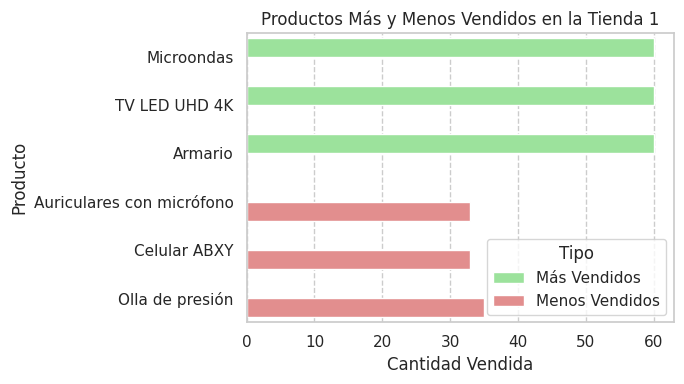

In [ ]:
# Generar un gráfico para TIENDA1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Crear un DataFrame para el gráfico de la Tienda 1 ---
conteo_ventas_productos = tienda1['Producto'].value_counts()
top_3_vendidos = conteo_ventas_productos.head(3)# más vendidos
menos_3_vendidos = conteo_ventas_productos.sort_values(ascending=True).head(3)#menos vendidos
lista_top_3 = list(top_3_vendidos.items())
lista_menos_3 = list(menos_3_vendidos.items())

#Convierte las listas de tuplas a DataFrames temporales
df_top = pd.DataFrame(lista_top_3, columns=['Producto', 'Cantidad_Vendida'])
df_top['Tipo'] = 'Más Vendidos'

df_bottom = pd.DataFrame(lista_menos_3, columns=['Producto', 'Cantidad_Vendida'])
df_bottom['Tipo'] = 'Menos Vendidos'

#Concatena los DataFrames
df_productos_combinados = pd.concat([df_top, df_bottom], ignore_index=True)

#USAR np.where para la columna 'Orden_Cantidad' ---
df_productos_combinados['Orden_Cantidad'] = np.where(
    df_productos_combinados['Tipo'] == 'Más Vendidos',  # Condición: si el Tipo es 'Más Vendidos'
    df_productos_combinados['Cantidad_Vendida'],        # Si es True, usa Cantidad_Vendida directamente
    -df_productos_combinados['Cantidad_Vendida']        # Si es False, usa Cantidad_Vendida negativa
)
# Ordena por el 'Tipo' y luego por 'Orden_Cantidad'
df_productos_combinados = df_productos_combinados.sort_values(by=['Tipo', 'Orden_Cantidad'], ascending=[False, False])
print("\nDataFrame combinado para el gráfico (df_productos_combinados):")
print(df_productos_combinados)
print("-" * 50)

# --- Construccion del gráfico ---
sns.set_theme(style="whitegrid")# Se hace con Seaborn
plt.rcParams['figure.figsize'] = (8, 4) # Tamaño de figura para un sólo gráfico
plt.figure(figsize=(7, 4)) # Tamaño de la figura

sns.barplot(
    x='Cantidad_Vendida',
    y='Producto',
    hue='Tipo',
    data=df_productos_combinados,
    palette={'Más Vendidos': 'lightgreen', 'Menos Vendidos': 'lightcoral'}, # Colores que contrastan
    dodge=True,
    order=df_productos_combinados['Producto'] # Asegura el orden correcto en el eje Y
)

plt.title(f'Productos Más y Menos Vendidos en la Tienda 1')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.grid(axis='x', linestyle='--') # Líneas de rejilla solo en el eje x

plt.tight_layout() # Ajusta el diseño
plt.show() # Muestra el gráfico

Generando gráficos para cada tienda...


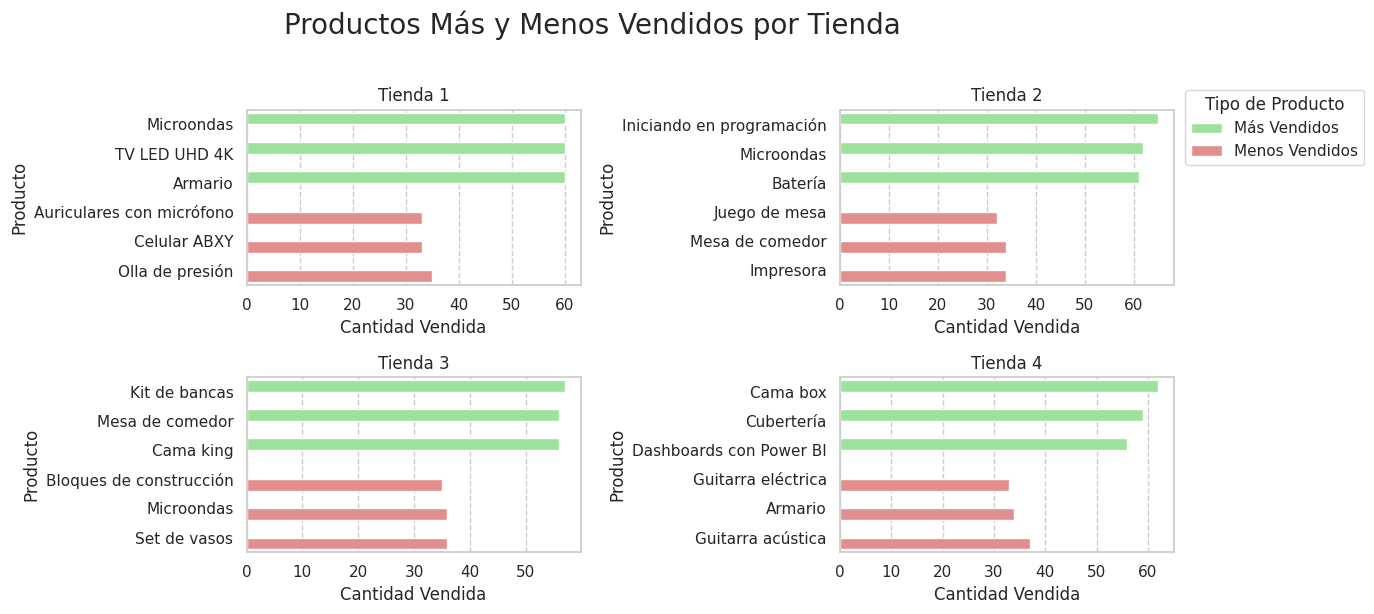


Todos los gráficos se han generado en una sola visualización.


In [ ]:
# GRAFICO PARA TODAS LAS TIENDAS

fig, axes = plt.subplots(2, 2)# para colocar los 4 gráficos juntos.
axes = axes.flatten()
fig.suptitle('Productos Más y Menos Vendidos por Tienda', fontsize=20, y=1.02) # Ajusta 'y' para moverlo un poco más arriba
print("Generando gráficos para cada tienda...")
handles, labels = None, None

# Iterar sobre el diccionario de tiendas con un contador para los subgráficos:
for i, (nombre_tienda, df_tienda) in enumerate(dataframes_tiendas.items()):
    conteo_ventas_productos = df_tienda['Producto'].value_counts()
    top_3_productos = conteo_ventas_productos.head(3)
    bottom_3_productos = conteo_ventas_productos.sort_values(ascending=True).head(3)
    df_top = top_3_productos.reset_index()
    df_top.columns = ['Producto', 'Cantidad_Vendida']
    df_top['Tipo'] = 'Más Vendidos'
    df_bottom = bottom_3_productos.reset_index()
    df_bottom.columns = ['Producto', 'Cantidad_Vendida']
    df_bottom['Tipo'] = 'Menos Vendidos'
    df_productos_combinados = pd.concat([df_top, df_bottom])
    df_productos_combinados['Orden_Cantidad'] = np.where(
        df_productos_combinados['Tipo'] == 'Más Vendidos',
        df_productos_combinados['Cantidad_Vendida'],
        -df_productos_combinados['Cantidad_Vendida']
    )
    df_productos_combinados = df_productos_combinados.sort_values(by=['Tipo', 'Orden_Cantidad'], ascending=[False, False])
    ax = axes[i] # Selecciona el subplot actual (ax = axis)
    sns.barplot(
        x='Cantidad_Vendida',
        y='Producto',
        hue='Tipo',
        data=df_productos_combinados,
        palette={'Más Vendidos': 'lightgreen', 'Menos Vendidos': 'lightcoral'},
        dodge=True,
        order=df_productos_combinados['Producto'],
        ax=ax # Indica el eje donde dibujar el gráfico
    )
    ax.legend_.remove()# Elimina la leyenda de cada subplot individual

    # ---  ---
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()# Se guardan los handles y labels del primer gráfico para la leyenda global
    ax.set_title(f'{nombre_tienda}')
    ax.set_xlabel('Cantidad Vendida')
    ax.set_ylabel('Producto')
    ax.grid(axis='x', linestyle='--') # Líneas de rejilla solo en el eje x

fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 0.9), title="Tipo de Producto") # Ajusta loc y bbox_to_anchor según necesidad
plt.tight_layout()

plt.show()# Mostrar los gráficos juntos

print("\nTodos los gráficos se han generado en una sola visualización.")

# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [ ]:
# Ingresos tienda 1:
print('Costo de envío promedio por tienda:')
cenvio_tienda1 = tienda1['Costo de envío'].mean()
cenvio_tienda2 = tienda2['Costo de envío'].mean()
cenvio_tienda3 = tienda3['Costo de envío'].mean()
cenvio_tienda4 = tienda4['Costo de envío'].mean()


print(f'Tienda 1: ${cenvio_tienda1:,.2f}')
print(f'Tienda 2: ${cenvio_tienda2:,.2f}')
print(f'Tienda 3: ${cenvio_tienda3:,.2f}')
print(f'Tienda 4: ${cenvio_tienda4:,.2f}')

Costo de envío promedio por tienda:
Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


In [ ]:
#Ingreso promedio-costo promedio por tienda

inetos_tienda1=tienda1['Precio'].mean()-tienda1['Costo de envío'].mean()
inetos_tienda2=tienda2['Precio'].mean()-tienda1['Costo de envío'].mean()
inetos_tienda3=tienda3['Precio'].mean()-tienda1['Costo de envío'].mean()
inetos_tienda4=tienda4['Precio'].mean()-tienda1['Costo de envío'].mean()

print('Ingresos netos promedio por tienda')
print(f'Tienda 1: ${inetos_tienda1:,.2f}')
print(f'Tienda 2: ${inetos_tienda2:,.2f}')
print(f'Tienda 3: ${inetos_tienda3:,.2f}')
print(f'Tienda 4: ${inetos_tienda4:,.2f}')

Ingresos netos promedio por tienda
Tienda 1: $461,849.30
Tienda 2: $447,208.82
Tienda 3: $439,441.16
Tienda 4: $414,344.28


ANALISIS EN ESTE PUNTO DEL DESAFIO

METRICAS de acuerdo a lo sugerido por ALURA:

- Ingreso total por cada tienda
- Ventas por categoría
- Valoración media por tienda
- Producto más vendido y menos vendido por tienda
- Costo Envío promedio por tienda

La revisión del 'Ingreso Total por cada tienda' mostró  que, si bien la Tienda 4 exhibe el nivel más bajo de ingresos totales acumulados en los últimos tres años, las diferencias entre los ingresos de las tiendas no son lo suficientemente significativas como para justificar una conclusión drástica basada únicamente en esta métrica. Esto sugiere que ninguna tienda presenta un desempeño excepcionalmente deficiente o sobresaliente en términos de volumen de ingresos que la diferencie marcadamente del resto.

En cuanto a las 'Ventas por Categoría' por tienda, se identifica una tendencia común: las cuatro tiendas exhiben sus mayores ventas en la categoría de 'Muebles'. Un hallazgo clave es que la valoración media por tienda es prácticamente idéntica en todos los casos. Esto sugiere una consistente satisfacción general del cliente con los productos ofrecidos en todos los establecimientos, a pesar de otras posibles variaciones.


Un punto de divergencia significativo se encuentra en los productos más vendidos individualmente por tienda. Aunque la cantidad de unidades vendidas de los productos estrella puede ser similar, los tipos de productos que dominan las ventas difieren notablemente entre cada establecimiento. Esto sugiere que cada tienda podría atender a una clientela con preferencias de producto ligeramente distintas o poseer una especialización implícita.

Finalmente, al considerar el costo de envío del producto, se observa que la Tienda 1 presenta los costos más elevados en esta categoría. No obstante, es crucial destacar que este factor no parece afectar su desempeño en ventas, lo que sugiere que los clientes de la Tienda 1 están dispuestos a asumir ese costo adicional o que otros factores positivos compensan esta diferencia.

Basado exclusivamente en las métricas analizadas hasta este punto, la sugerencia de cerrar la Tienda 4 debido a su menor nivel de ingresos es prematura. Si bien es el establecimiento con el rendimiento más bajo en esa métrica particular, la ausencia de una diferencia abrumadora en los ingresos totales entre las tiendas, sumada a las fortalezas compartidas en ciertas categorías (como 'Muebles'), la consistente valoración media del cliente y las peculiaridades en los productos más vendidos que no se traducen necesariamente en bajo rendimiento, indica que estos datos no son determinantes por sí solos para tomar una decisión de su venta.

En base a estos hallazgos iniciales, y con el fin de obtener una visión más concluyente, se decidió realizar cuatro análisis adicionales, aprovechando la información disponible en los DataFrames que no había sido considerada previamente.


Nuevas métricas a explorar:

Método de pago: Si una tienda depende mucho de ventas a muchas cuotas, su flujo de caja podría ser más lento, lo que podría indicar ineficiencia financiera.

Temporalidad de Ventas:¿La Tienda 4 tiene una tendencia a la baja constante a lo largo del tiempo, mientras que otras se mantienen estables o crecen? ¿Hay estacionalidad que no se está aprovechando?

Distribución geográfica de las ventas. ¿Cómo esta constituido el mercado de cada tienda, en Colombia?.

Desempeño_empleados: ¿Cómo es la composición y el desempeño de los equipos de trabajo?



# 6) Método de pago

In [ ]:
# 1) ANALISIS MÉTODO DE PAGO PARA TIENDA 1

df_pagos_tienda1 = tienda1.groupby('Método de pago').agg(
    Ingreso_Metodo_Pago=('Precio', 'sum'),
    Numero_transacciones=('Precio', 'size'), # Cuenta el número de filas en cada grupo
    Cuotas_Promedio=('Cantidad de cuotas', 'mean'), # Calcular el promedio de cuotas
    Maximo_Cuotas=('Cantidad de cuotas','max')
)

# Redondear promedio de cuotas de las tarjetas de credito
df_pagos_tienda1['Cuotas_Promedio'] = df_pagos_tienda1['Cuotas_Promedio'].round(2)

# Imprimir en pantalla los resultados
print("\nNuevo DataFrame: Análisis de Métodos de Pago en Tienda 1 (Precio, Transacciones, Cuotas Promedio):")
print(df_pagos_tienda1)
print("-" * 50)


Nuevo DataFrame: Análisis de Métodos de Pago en Tienda 1 (Precio, Transacciones, Cuotas Promedio):
                    Ingreso_Metodo_Pago  Numero_transacciones  \
Método de pago                                                  
Cupón                        64105500.0                   137   
Nequi                       232609700.0                   483   
Tarjeta de crédito          840665800.0                  1704   
Tarjeta de débito            13499400.0                    35   

                    Cuotas_Promedio  Maximo_Cuotas  
Método de pago                                      
Cupón                          1.00              1  
Nequi                          1.00              1  
Tarjeta de crédito             3.69             24  
Tarjeta de débito              1.00              1  
--------------------------------------------------


In [ ]:
# PARA TODAS LAS TIENDAS
# Consolidar los DataFrames de cada una de las tiendas, añadiendo la columna 'Tienda'
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df_consolidado = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)# juntarlos todos en un dataframe
analisis_por_tienda = {} # diccionario que almacena los análisis por tienda
nombres_tiendas = df_consolidado['Tienda'].unique() # lista de tiendas

for nombre_tienda in nombres_tiendas:
    df_tienda_actual = df_consolidado[df_consolidado['Tienda'] == nombre_tienda].copy()
    if not df_tienda_actual.empty:
      df_analisis_actual = df_tienda_actual.groupby('Método de pago').agg(
            Ingreso_Total=('Precio', 'sum'),
            Numero_Transacciones=('Precio', 'size'),
            Cuotas_Promedio=('Cantidad de cuotas', 'mean'),
            maximo_cuotas=('Cantidad de cuotas','max'),
            )
      df_analisis_actual['Cuotas_Promedio'] = df_analisis_actual['Cuotas_Promedio'].round(2)
      analisis_por_tienda[nombre_tienda] = df_analisis_actual
    else:
        print(f"No hay datos de transacciones para {nombre_tienda}.")

print("\n--- Análisis Método de pago para cada tienda ---")
for tienda_nombre, df_result in analisis_por_tienda.items():
    print(f"\nResultados para {tienda_nombre}:")
    print(df_result)


--- Análisis Método de pago para cada tienda ---

Resultados para Tienda 1:
                    Ingreso_Total  Numero_Transacciones  Cuotas_Promedio  \
Método de pago                                                             
Cupón                  64105500.0                   137             1.00   
Nequi                 232609700.0                   483             1.00   
Tarjeta de crédito    840665800.0                  1704             3.69   
Tarjeta de débito      13499400.0                    35             1.00   

                    maximo_cuotas  
Método de pago                     
Cupón                           1  
Nequi                           1  
Tarjeta de crédito             24  
Tarjeta de débito               1  

Resultados para Tienda 2:
                    Ingreso_Total  Numero_Transacciones  Cuotas_Promedio  \
Método de pago                                                             
Cupón                  77366600.0                   141             1.0

# 7) Temporalidad de ventas



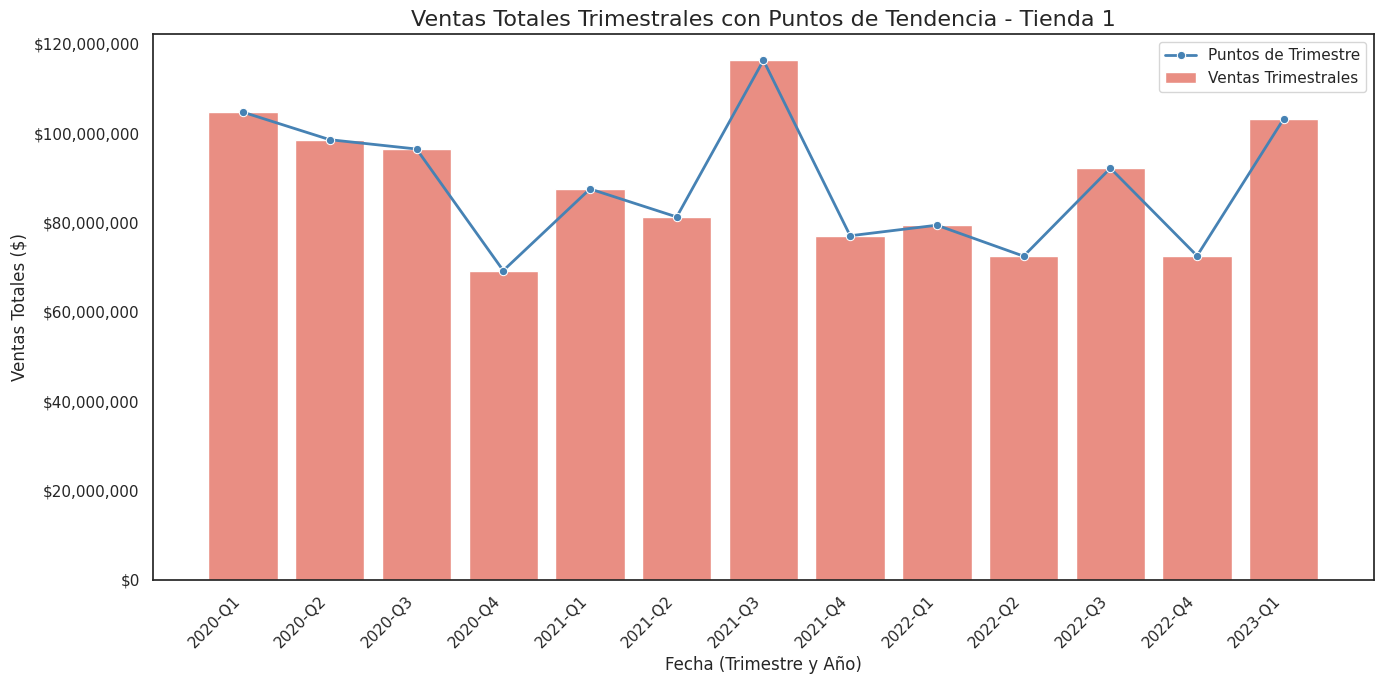

In [ ]:
# GRAFICO PARA LA TIENDA 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")
plt.rcParams['figure.figsize'] = (12, 6)

# Calculo ventas totales por trimestre.
tienda1['Trimestre_Anio'] = tienda1['Fecha de Compra'].dt.to_period('Q') # Trimestre y año de la fecha para agrupar por cuartiles
ventas_trimestre = tienda1.groupby('Trimestre_Anio')['Precio'].sum().reset_index()  #Agrupar por Trimestre_Anio y sumar el Precio
ventas_trimestre['Trimestre_Anio_DT'] = ventas_trimestre['Trimestre_Anio'].dt.to_timestamp()# convierte a datetime, el trimestre

# Crear el gráfico de barras y superpone+ la línea de puntos

plt.figure(figsize=(14, 7))
ventas_trimestre['idx_numerico'] = range(len(ventas_trimestre))# Crea un indice para el eje X, basado en los trimestres

sns.barplot(
    x='idx_numerico',
    y='Precio',
    data=ventas_trimestre,
    color='salmon',
    label='Ventas Trimestrales',
    #edgecolor='black',
    ax=plt.gca()
)
sns.lineplot(
    x='idx_numerico',
    y='Precio',
    data=ventas_trimestre,
    marker='o',
    color='steelblue',
    linewidth=2,
    linestyle='-',
    label='Puntos de Trimestre',
    ax=plt.gca()
)
plt.title('Ventas Totales Trimestrales con Puntos de Tendencia - Tienda 1', fontsize=16)
plt.xlabel('Fecha (Trimestre y Año)', fontsize=12)
plt.ylabel('Ventas Totales ($)', fontsize=12)

# Configurar las etiquetas del eje X para mostrar los nombres de los trimestres
quarter_labels = []
for index, row in ventas_trimestre.iterrows():
    year = row['Trimestre_Anio_DT'].year # Obtener el año
    quarter_num = row['Trimestre_Anio_DT'].quarter # Obtener el número de trimestre (1, 2, 3, 4)
    quarter_labels.append(f'{year}-Q{quarter_num}')

plt.xticks(
    ticks=ventas_trimestre['idx_numerico'], # Posiciones de los ticks
    labels=quarter_labels, # ¡Usar las etiquetas construidas manualmente!
    rotation=45,
    ha='right'
)

# Formatea el eje Y para mostrar el símbolo de moneda y separadores de miles
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

plt.legend()
plt.tight_layout()
plt.show()



1150880400.0 1150880400.0
1116343500.0 1116343500.0
1098019600.0 1098019600.0
1038375700.0 1038375700.0


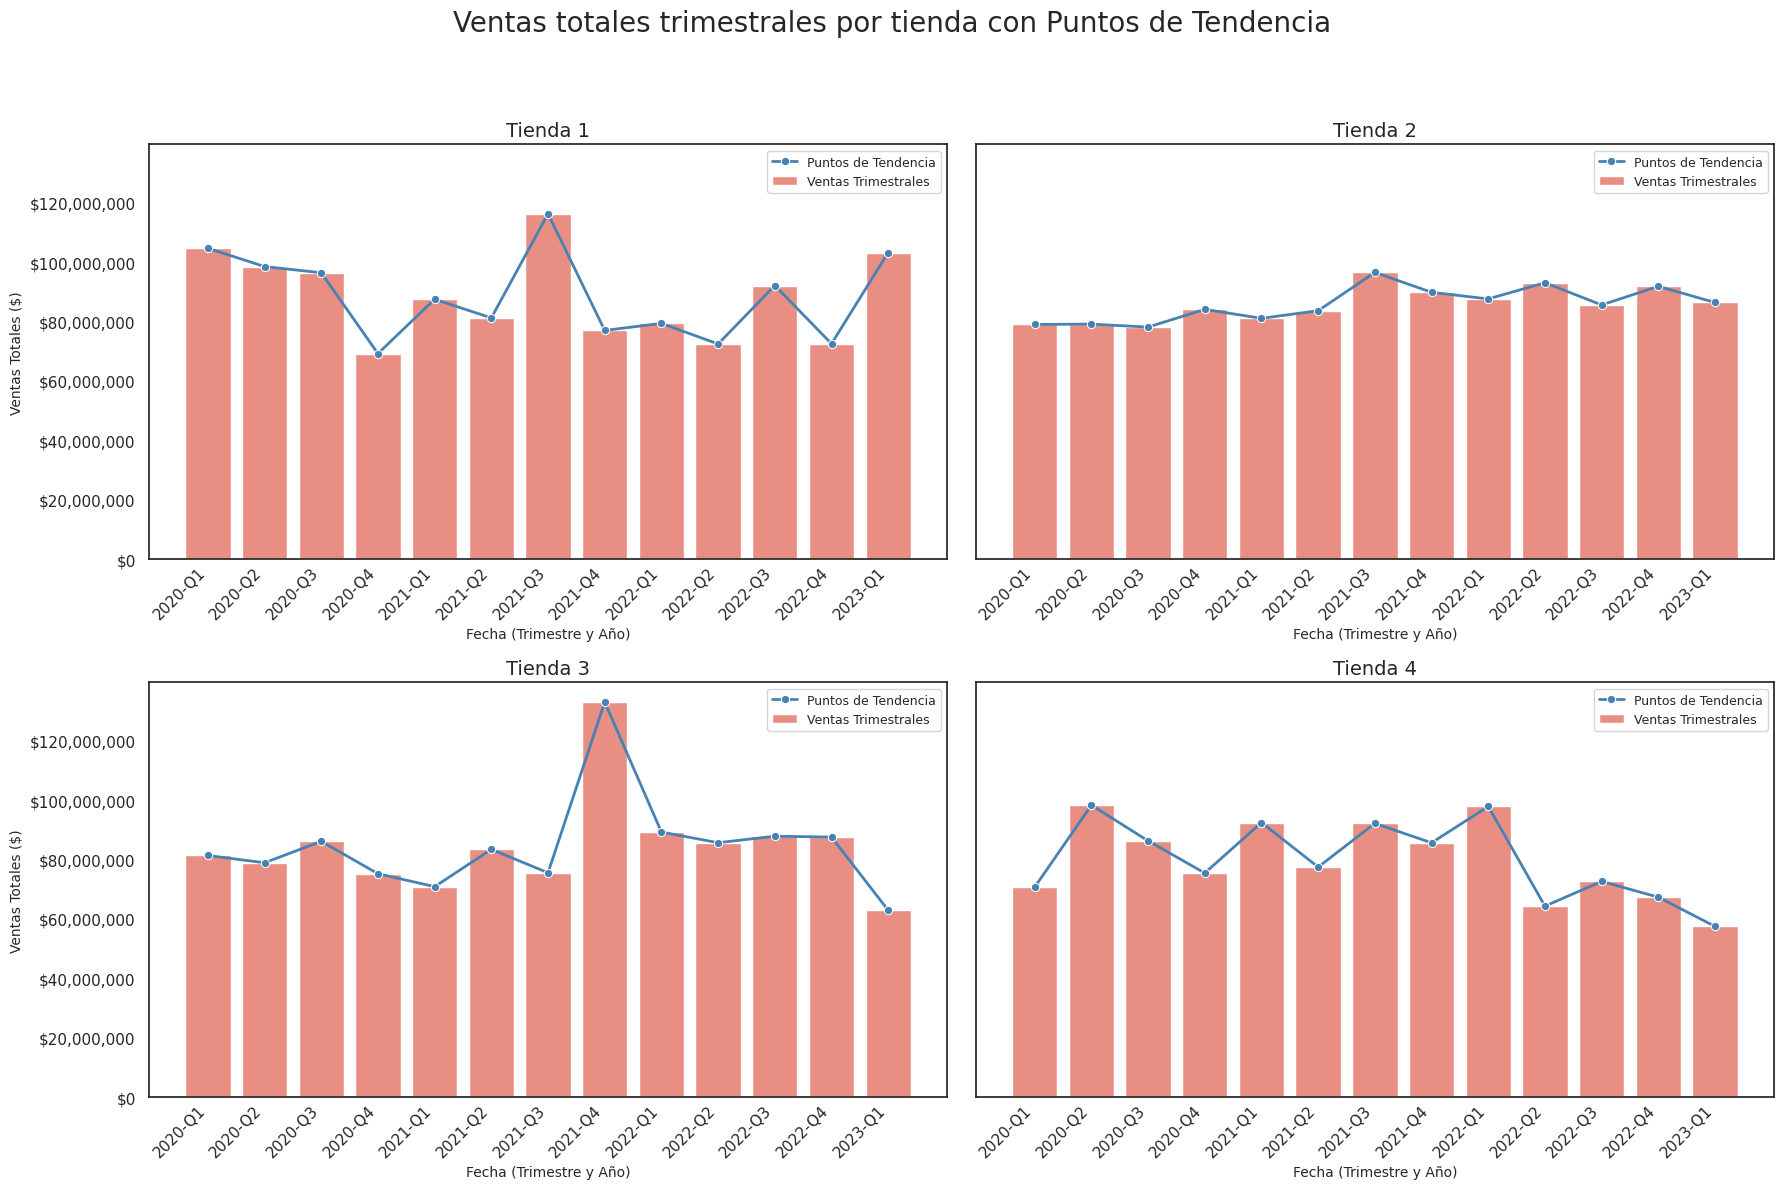

In [ ]:
#Para las cuatro tiendas, en un sólo gráfico

sns.set_theme(style="white") # Esto ya quita la grilla de fondo.

dataframes_tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12), sharey=True) # crea la disposición para los cuatro graficos
axes = axes.flatten()
# Título para los cuatro gráficos
fig.suptitle('Ventas totales trimestrales por tienda con Puntos de Tendencia', fontsize=20, y=1.02)
# Iterar en cada tienda y crear el gráfico
for i, (nombre_tienda, df_tienda) in enumerate(dataframes_tiendas.items()):
    ax = axes[i] # Selecciona el subgráfico

    # Calculo ventas totales por trimestre para la tienda actual
    df_tienda['Trimestre_Anio'] = df_tienda['Fecha de Compra'].dt.to_period('Q')
    ventas_trimestre = df_tienda.groupby('Trimestre_Anio')['Precio'].sum().reset_index()
    ventas_trimestre['Trimestre_Anio_DT'] = ventas_trimestre['Trimestre_Anio'].dt.to_timestamp()
    ventas_trimestre['idx_numerico'] = range(len(ventas_trimestre))
    suma_ventas_trimestre=ventas_trimestre['Precio'].sum()# para comprobar que los calculos estan bien
    ingresos_totales = df_tienda['Precio'].sum()# para comprobar que los calculos están bien.
    print(suma_ventas_trimestre,ingresos_totales)# para comprobar que los calculos están bien.

    #Quitar el marco exterior y la grilla interior para cada subgráfico
    for spine in ax.spines.values():
    #     spine.set_visible(False)
    # ax.grid(False) # Desactiva la grilla para este subgráfico
    # ax.tick_params(left=False, bottom=False) # Quita los ticks pequeños
      ax.xaxis.set_tick_params(which='both', length=0)
    # ax.yaxis.set_tick_params(which='both', length=0)
    # ----------------------------------------------------------------------

    # Gráfico de Barras
    sns.barplot(
        x='idx_numerico',
        y='Precio',
        data=ventas_trimestre,
        color='salmon',
        label='Ventas Trimestrales',
        ax=ax # Pasar el 'ax' actual al sns.barplot
    )
    # Gráfico de puntos de tendencia
    sns.lineplot(
        x='idx_numerico',
        y='Precio',
        data=ventas_trimestre,
        marker='o',
        color='steelblue',
        linewidth=2,
        linestyle='-',
        label='Puntos de Tendencia',
        ax=ax # Pasar el 'ax' actual al sns.lineplot
    )

    ax.set_title(nombre_tienda, fontsize=14) # Título específico para cada subgráfico
    ax.set_xlabel('Fecha (Trimestre y Año)', fontsize=10)
    ax.set_ylabel('Ventas Totales ($)', fontsize=10)

    # Configurar las etiquetas del eje X
    quarter_labels = []
    for index, row in ventas_trimestre.iterrows():
        year = row['Trimestre_Anio_DT'].year
        quarter_num = row['Trimestre_Anio_DT'].quarter
        quarter_labels.append(f'{year}-Q{quarter_num}')

    ax.set_xticks(
        ticks=ventas_trimestre['idx_numerico'],
        labels=quarter_labels,
        rotation=45,
        ha='right'
    )

    # Formatear el eje Y
    #ax.ticklabel_format(style='plain', axis='y')
    ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

    ax.legend(fontsize=9) # Leyenda para cada subgráfico

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajustar el diseño para evitar superposiciones
plt.show()



# 8)Analisis espacial del área de influencia de las 4 tiendas


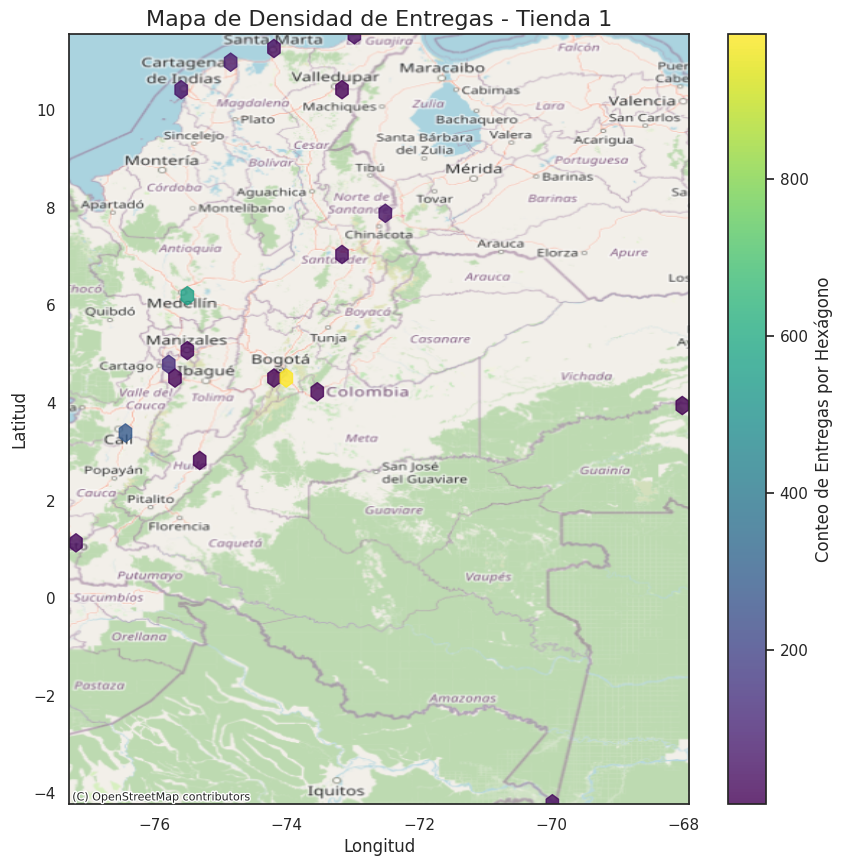

In [ ]:
# PARA LA TIENDA 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx # Importar contextily para colocar el mapa de fondo
from shapely.geometry import Point # Para convertir lat/lon a objetos espaciales
# Configuración del gráfico para Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
margin = 0.01 # margen para que los puntos no queden en el borde.
min_lat, max_lat = tienda1['lat'].min() - margin, tienda1['lat'].max() + margin
min_lon, max_lon = tienda1['lon'].min() - margin, tienda1['lon'].max() + margin
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

hb = ax.hexbin(tienda1['lon'], tienda1['lat'], gridsize=50, cmap='viridis', mincnt=1, alpha=0.8)
# Para puntos individuales con transparencia, descomentar la siguiente línea y comentar hexbin
# ax.scatter(tienda1['lon'], tienda1['lat'], s=50, alpha=0.3, c='blue', label='Puntos de Entrega')

plt.colorbar(hb, ax=ax, label='Conteo de Entregas por Hexágono') # Barra de color para hexbin

#Añadir el mapa base de Contextily
cx.add_basemap(ax, crs=tienda1.crs if hasattr(tienda1, 'crs') else 'EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik)

ax.set_title('Mapa de Densidad de Entregas - Tienda 1', fontsize=16)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)

#Guardar la figura en formato PDF
# pdf_file_path = 'mapa_densidad_entregas_tienda1.pdf'
# plt.savefig(pdf_file_path, bbox_inches='tight', dpi=300) # dpi=300 para buena resolución
plt.show() # Mostrar el gráfico en pantalla
#print(f"\nMapa de densidad de entregas generado y guardado como PDF en: {pdf_file_path}")


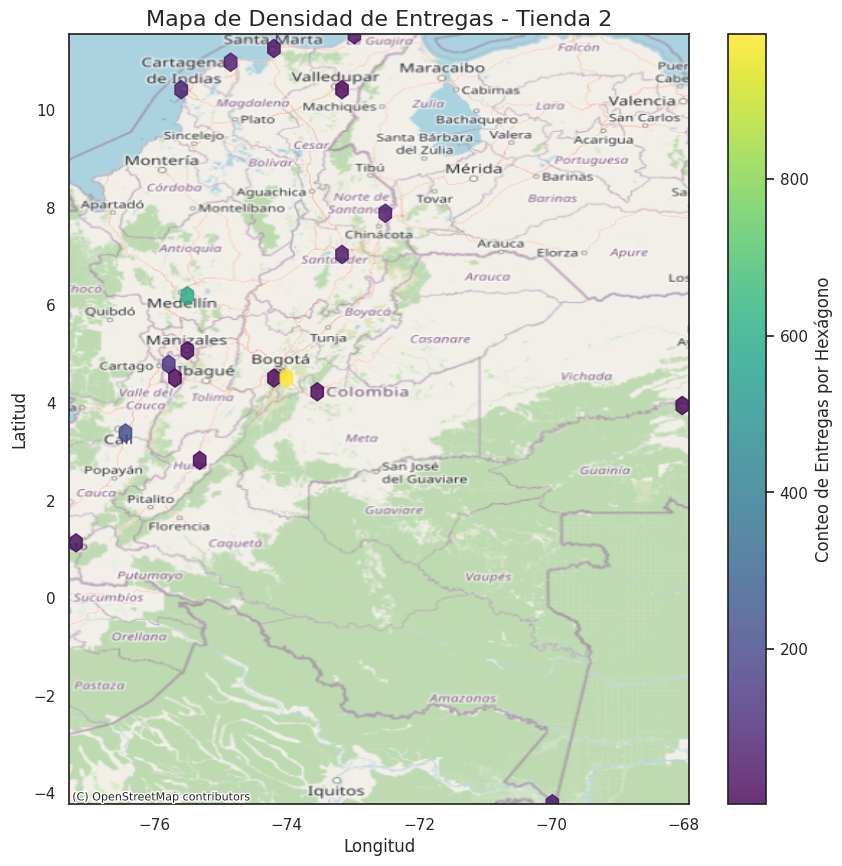

In [ ]:
# PARA LA TIENDA 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx # Importar contextily para colocar el mapa de fondo
from shapely.geometry import Point # Para convertir lat/lon a objetos espaciales
# Configuración del gráfico para Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
margin = 0.01 # margen para que los puntos no queden en el borde.
min_lat, max_lat = tienda2['lat'].min() - margin, tienda2['lat'].max() + margin
min_lon, max_lon = tienda2['lon'].min() - margin, tienda2['lon'].max() + margin
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

hb = ax.hexbin(tienda2['lon'], tienda2['lat'], gridsize=50, cmap='viridis', mincnt=1, alpha=0.8)
# Para puntos individuales con transparencia, descomentar la siguiente línea y comentar hexbin
# ax.scatter(tienda2['lon'], tienda2['lat'], s=50, alpha=0.3, c='blue', label='Puntos de Entrega')

plt.colorbar(hb, ax=ax, label='Conteo de Entregas por Hexágono') # Barra de color para hexbin

#Añadir el mapa base de Contextily
cx.add_basemap(ax, crs=tienda2.crs if hasattr(tienda2, 'crs') else 'EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik)

ax.set_title('Mapa de Densidad de Entregas - Tienda 2', fontsize=16)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)

#Guardar la figura en formato PDF
# pdf_file_path = 'mapa_densidad_entregas_tienda1.pdf'
# plt.savefig(pdf_file_path, bbox_inches='tight', dpi=300) # dpi=300 para buena resolución
plt.show() # Mostrar el gráfico en pantalla
#print(f"\nMapa de densidad de entregas generado y guardado como PDF en: {pdf_file_path}")

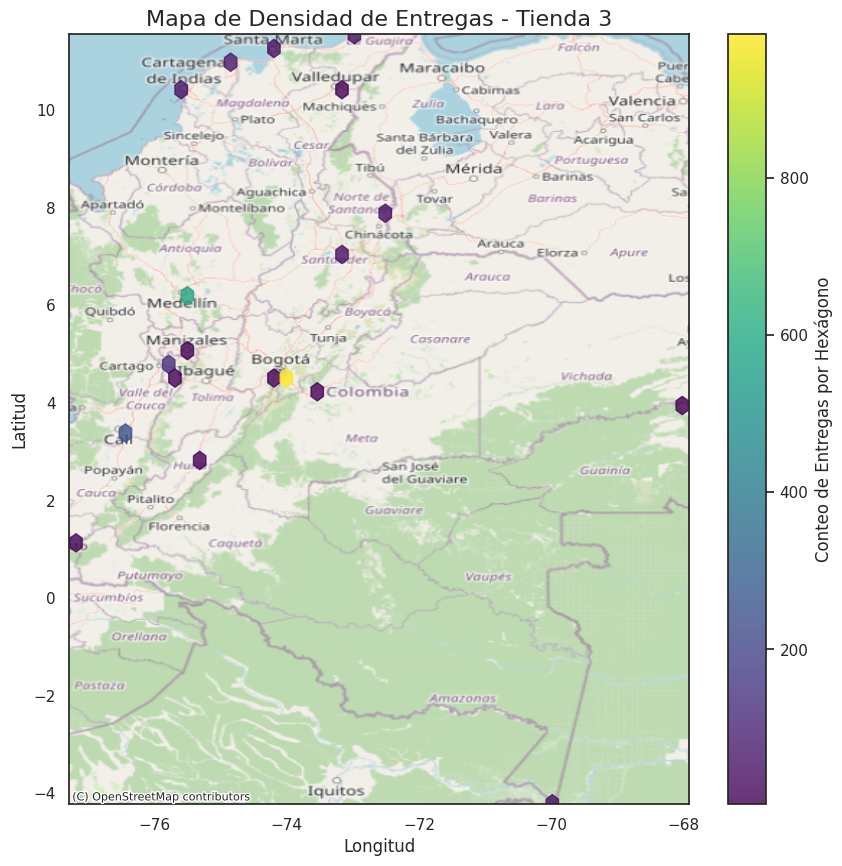

In [ ]:
# Para la tienda 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx # Importar contextily para colocar el mapa de fondo
from shapely.geometry import Point # Para convertir lat/lon a objetos espaciales
# Configuración del gráfico para Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
margin = 0.01 # margen para que los puntos no queden en el borde.
min_lat, max_lat = tienda3['lat'].min() - margin, tienda3['lat'].max() + margin
min_lon, max_lon = tienda3['lon'].min() - margin, tienda3['lon'].max() + margin
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

hb = ax.hexbin(tienda3['lon'], tienda3['lat'], gridsize=50, cmap='viridis', mincnt=1, alpha=0.8)
# Para puntos individuales con transparencia, descomentar la siguiente línea y comentar hexbin
# ax.scatter(tienda3['lon'], tienda3['lat'], s=50, alpha=0.3, c='blue', label='Puntos de Entrega')

plt.colorbar(hb, ax=ax, label='Conteo de Entregas por Hexágono') # Barra de color para hexbin

#Añadir el mapa base de Contextily
cx.add_basemap(ax, crs=tienda3.crs if hasattr(tienda3, 'crs') else 'EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik)

ax.set_title('Mapa de Densidad de Entregas - Tienda 3', fontsize=16)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)

#Guardar la figura en formato PDF
# pdf_file_path = 'mapa_densidad_entregas_tienda1.pdf'
# plt.savefig(pdf_file_path, bbox_inches='tight', dpi=300) # dpi=300 para buena resolución
plt.show() # Mostrar el gráfico en pantalla
#print(f"\nMapa de densidad de entregas generado y guardado como PDF en: {pdf_file_path}")

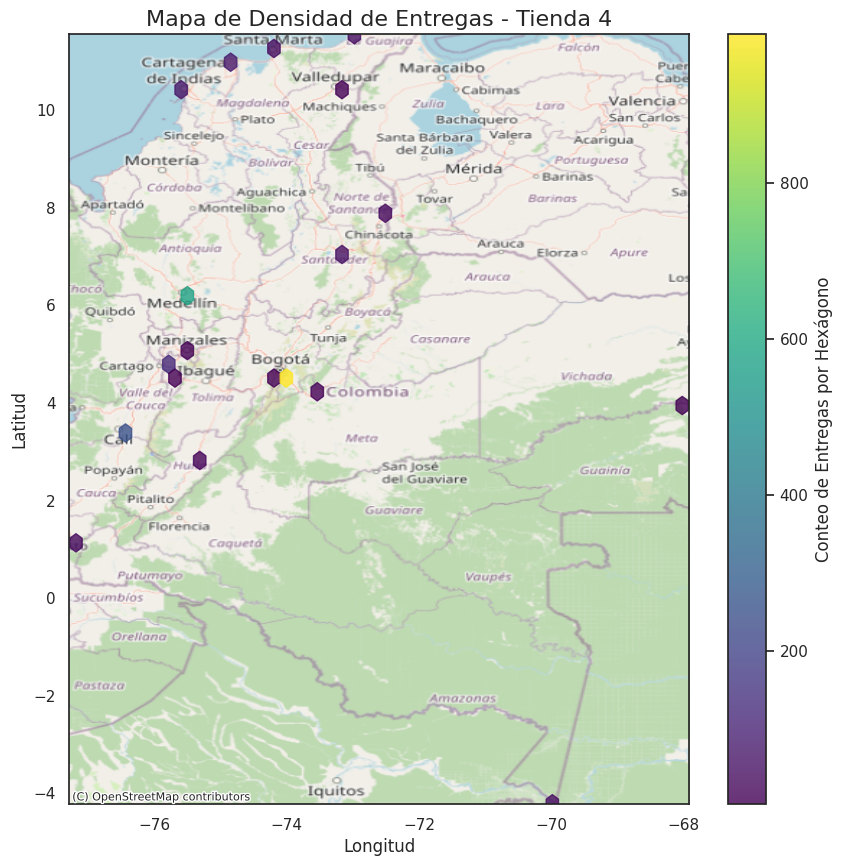

In [ ]:
# Para la tienda 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx # Importar contextily para colocar el mapa de fondo
from shapely.geometry import Point # Para convertir lat/lon a objetos espaciales
# Configuración del gráfico para Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
margin = 0.01 # margen para que los puntos no queden en el borde.
min_lat, max_lat = tienda4['lat'].min() - margin, tienda4['lat'].max() + margin
min_lon, max_lon = tienda4['lon'].min() - margin, tienda4['lon'].max() + margin
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

hb = ax.hexbin(tienda4['lon'], tienda4['lat'], gridsize=50, cmap='viridis', mincnt=1, alpha=0.8)
# Para puntos individuales con transparencia, descomentar la siguiente línea y comentar hexbin
# ax.scatter(tienda4['lon'], tienda4['lat'], s=50, alpha=0.3, c='blue', label='Puntos de Entrega')

plt.colorbar(hb, ax=ax, label='Conteo de Entregas por Hexágono') # Barra de color para hexbin

#Añadir el mapa base de Contextily
cx.add_basemap(ax, crs=tienda4.crs if hasattr(tienda4, 'crs') else 'EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik)

ax.set_title('Mapa de Densidad de Entregas - Tienda 4', fontsize=16)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)

#Guardar la figura en formato PDF
# pdf_file_path = 'mapa_densidad_entregas_tienda1.pdf'
# plt.savefig(pdf_file_path, bbox_inches='tight', dpi=300) # dpi=300 para buena resolución
plt.show() # Mostrar el gráfico en pantalla
#print(f"\nMapa de densidad de entregas generado y guardado como PDF en: {pdf_file_path}")import pandas as pd


In [ ]:
#Análisis de las compras por lugar, durante el último año, para la tienda 1
ultimo_trimestre = tienda1['Fecha de Compra'].dt.to_period('Q').max()
print(f"El último trimestre en los datos es: {ultimo_trimestre}")
trimestres = []
current_q = ultimo_trimestre
for _ in range(4):# sólo interesa que el bucle se ejecute 4 veces.
    trimestres.append(current_q)
    current_q = current_q - 1# La resta directa funciona con Period
trimestres.sort() #orden cronológico ascendente

print(f"Los cuatro últimos trimestres a considerar son: {trimestres}")
print("-" * 50)
# Filtrar el DataFrame 'tienda1' para incluir solo los datos de los últimos cuatro trimestres
cuatro_trimestres = tienda1[
    tienda1['Fecha de Compra'].dt.to_period('Q').isin(trimestres)
].copy()
# Análisis de agrupación en el DataFrame FILTRADO
filtrado_cuatro_trimestres = cuatro_trimestres.groupby('Lugar de Compra').agg(
        Numero_de_Compras=('Precio', 'count'),
        Monto_Total_Compras=('Precio', 'sum')
         )
# Ordena por Monto total de compras de forma descendente
trimestres_ordenado = filtrado_cuatro_trimestres.sort_values(
        by='Monto_Total_Compras',
        ascending=False
        ).reset_index()
print("\nAnálisis por Lugar de Compra para los ÚLTIMOS 4 TRIMESTRES de la TIENDA 1 ")
print(trimestres_ordenado)

El último trimestre en los datos es: 2023Q1
Los cuatro últimos trimestres a considerar son: [Period('2022Q2', 'Q-DEC'), Period('2022Q3', 'Q-DEC'), Period('2022Q4', 'Q-DEC'), Period('2023Q1', 'Q-DEC')]
--------------------------------------------------

Análisis por Lugar de Compra para los ÚLTIMOS 4 TRIMESTRES de la TIENDA 1 
   Lugar de Compra  Numero_de_Compras  Monto_Total_Compras
0           Bogotá                316          126858900.0
1         Medellín                172           92371600.0
2             Cali                 96           46870600.0
3          Pereira                 46           21557100.0
4           Cúcuta                 21           15104500.0
5        Cartagena                 12            6156400.0
6      Bucaramanga                 10            6061000.0
7     Barranquilla                 15            4425300.0
8         Riohacha                 10            3807300.0
9           Soacha                  2            3414300.0
10         Leticia     

In [ ]:
# Construcción función para ser utilizada para todas las tiendas:
def compras_ultimos_4_trimestres(df_tienda: pd.DataFrame):
    ultimo_trimestre = df_tienda['Fecha de Compra'].dt.to_period('Q').max()# identifica el último trimestre en los datos
    # Calcula los cuatro últimos trimestres
    trimestres = []
    current_q = ultimo_trimestre
    for _ in range(4):
        trimestres.append(current_q)
        current_q = current_q - 1
    trimestres.sort() # Orden cronológico ascendente
    #Filtra el DataFrame para incluir solo los datos de esos trimestres
    cuatro_trimestres = df_tienda[
        df_tienda['Fecha de Compra'].dt.to_period('Q').isin(trimestres)
    ].copy()
    if cuatro_trimestres.empty:
        print(f"Advertencia: No hay datos para los últimos 4 trimestres ({trimestres}) en el DataFrame.")
        return pd.DataFrame(columns=['Lugar de Compra', 'Numero_de_Compras', 'Monto_Total_Compras'])
    # Análisis de agrupación en el DataFrame FILTRADO
    filtrado_cuatro_trimestres = cuatro_trimestres.groupby('Lugar de Compra').agg(
        Numero_de_Compras=('Precio', 'count'),
        Monto_Total_Compras=('Precio', 'sum')
    )
    # Ordena por Monto total de compras de forma descendente y resetea el índice
    trimestres_ordenado = filtrado_cuatro_trimestres.sort_values(
        by='Monto_Total_Compras',
        ascending=False
    ).reset_index()
    return trimestres_ordenado


In [ ]:
# Aplicar la función para generar los DataFrame, necesarios para el gráfico circular.
trimestres_tienda1 = compras_ultimos_4_trimestres(tienda1)
trimestres_tienda2 = compras_ultimos_4_trimestres(tienda2)
trimestres_tienda3 = compras_ultimos_4_trimestres(tienda3)
trimestres_tienda4 = compras_ultimos_4_trimestres(tienda4)
print(trimestres_tienda4)

   Lugar de Compra  Numero_de_Compras  Monto_Total_Compras
0           Bogotá                266           94609900.0
1         Medellín                162           61996700.0
2             Cali                 81           38639900.0
3          Pereira                 41           21841500.0
4     Barranquilla                 29           13562800.0
5         Riohacha                 16            7707300.0
6      Bucaramanga                 13            6093600.0
7      Santa Marta                 14            5686200.0
8          Leticia                  9            3815400.0
9            Pasto                  9            2566800.0
10       Cartagena                 15            2069400.0
11          Cúcuta                  8            1449400.0
12           Neiva                  3            1086100.0
13   Villavicencio                  2             282100.0
14       Manizales                  1             212400.0
15         Armenia                  1             193400


DataFrame para el gráfico circular:
     Lugar de Compra  Numero_de_Compras  Monto_Total_Compras
0             Bogotá                316          126858900.0
1           Medellín                172           92371600.0
2               Cali                 96           46870600.0
3  Otras Localidades                147           74325400.0
--------------------------------------------------


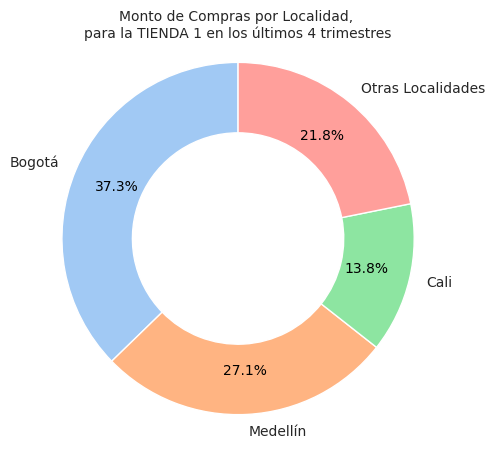

In [ ]:
# Construcción gráfica circular para tienda 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Estilo Seaborn
sns.set_theme(style="white")
plt.rcParams['figure.figsize'] = (6,4) # Ajusta el tamaño de la figura
# Trabajo con los datos para ordenar las tres primeras localidaes y agrupar el resto
top_3_localidades = trimestres_ordenado.head(3).copy() # guardo las 3 primeras del DataFrame
otras_localidades = trimestres_ordenado.iloc[3:].copy()# guardo el resto de las localidades
monto_otras = otras_localidades['Monto_Total_Compras'].sum()# sumo el total de compras del resto localidades
# creo una nueva fila para "Otras Localidades"
otras_fila = pd.DataFrame([{
    'Lugar de Compra': 'Otras Localidades',
    'Numero_de_Compras': otras_localidades['Numero_de_Compras'].sum(), # Opcional: sumar también el número de compras
    'Monto_Total_Compras': monto_otras
}])

# Combinar el top 3 con la fila de "Otras Localidades"
df_grafico_circular = pd.concat([top_3_localidades, otras_fila], ignore_index=True)
print("\nDataFrame para el gráfico circular:")
print(df_grafico_circular)
print("-" * 50)
# Crear el gráfico
fig, ax = plt.subplots(figsize=(5, 5)) # Tamaño para un mejor visualización
wedges, texts, autotexts = ax.pie(
    df_grafico_circular['Monto_Total_Compras'],
    labels=df_grafico_circular['Lugar de Compra'], # Etiquetas de las porciones
    autopct='%1.1f%%', # Formato para mostrar los porcentajes
    startangle=90,     # Inicia el primer segmento desde la parte superior
    pctdistance=0.75,  # Distancia de los porcentajes del centro (para que no se solapen con las etiquetas)
    colors=sns.color_palette("pastel"), # Paleta de colores más suaves de Seaborn
    wedgeprops=dict(width=0.4, edgecolor='white')# Esto crea un "donut" chart (anillo) y añade borde blanco
    )
# Ajusta el tamaño del texto para las etiquetas y los porcentajes
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('black') # Color del texto de porcentaje
ax.set_title('Monto de Compras por Localidad, \npara la TIENDA 1 en los últimos 4 trimestres', fontsize=10)
ax.axis('equal') # Asegura que el círculo sea un círculo y no una elipse
plt.show()


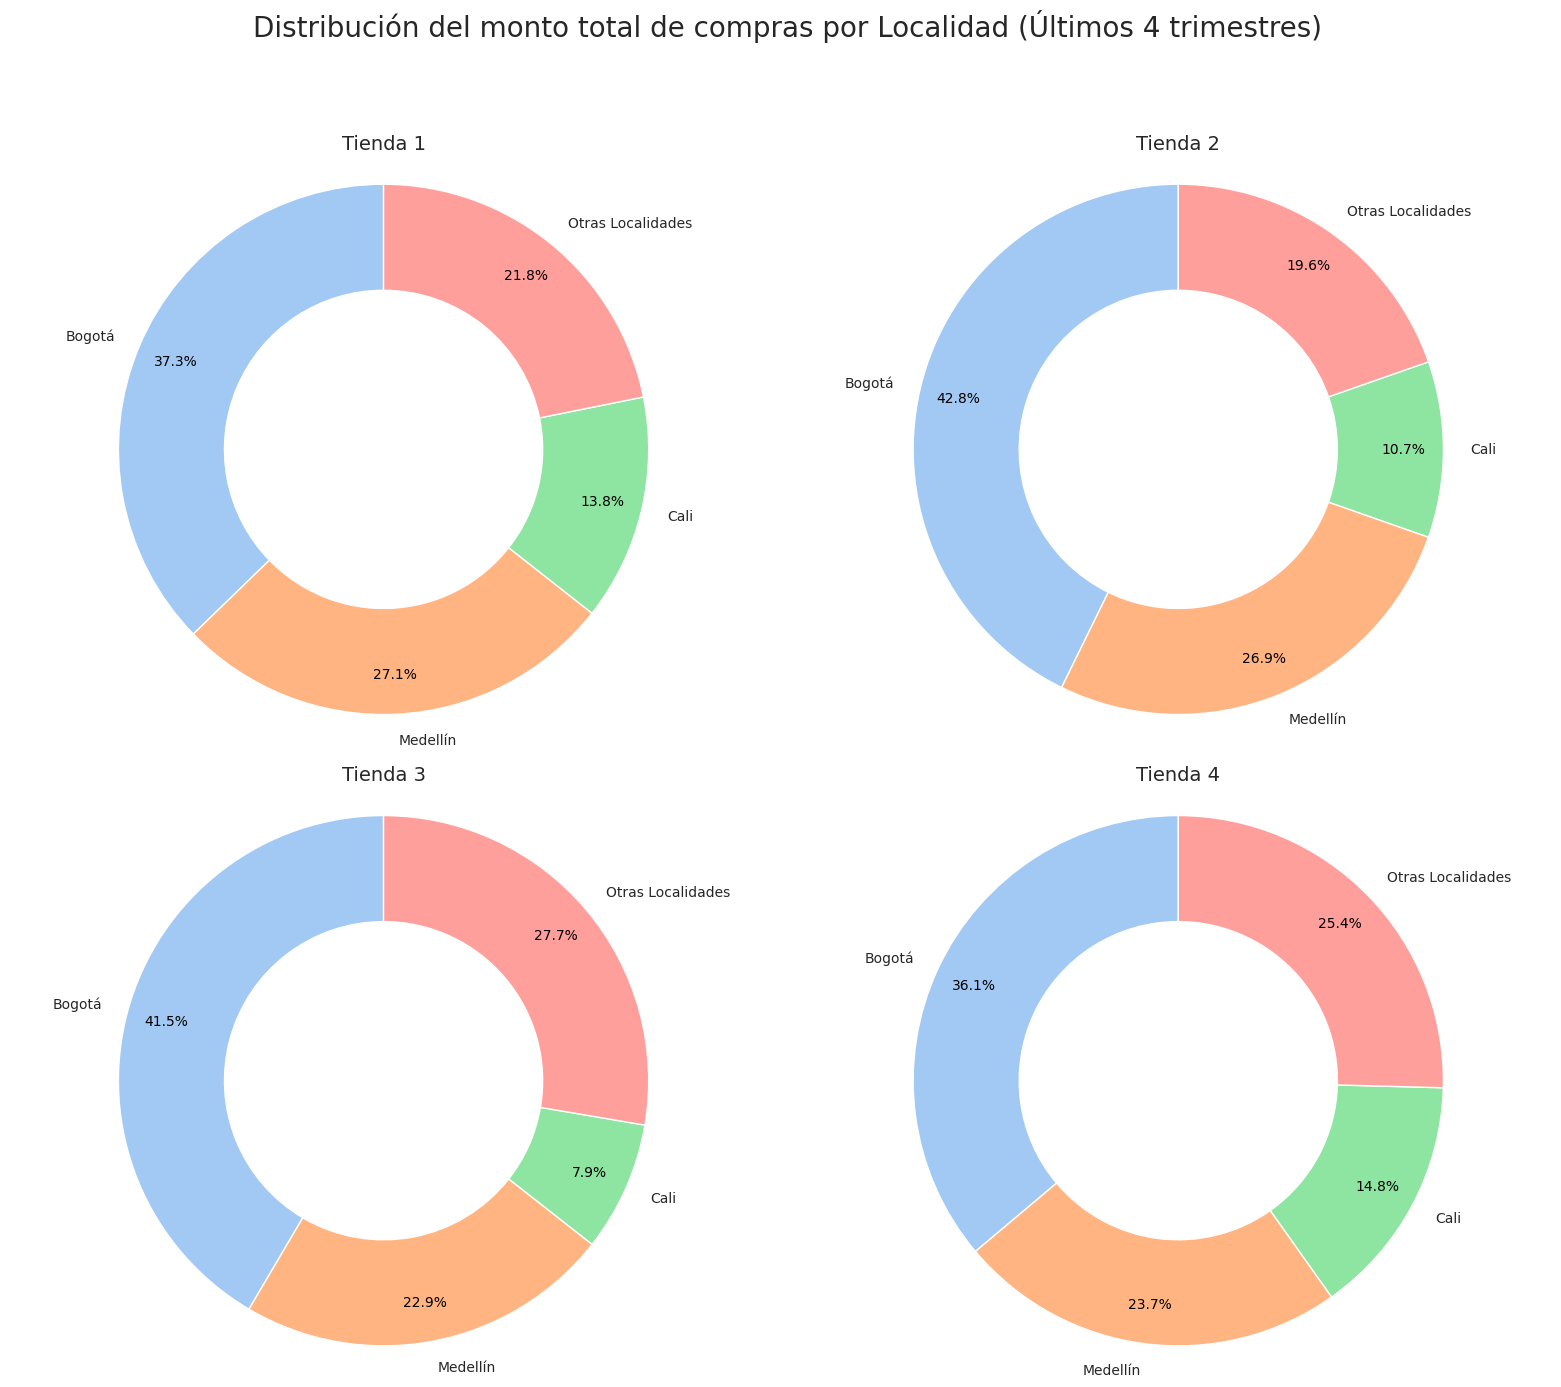

In [ ]:
#Gráfico circular para las cuatro tiendas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario para facilitar la iteración sobre los DataFrames
dataframes_analisis = {
    'Tienda 1': trimestres_tienda1,
    'Tienda 2': trimestres_tienda2,
    'Tienda 3': trimestres_tienda3,
    'Tienda 4': trimestres_tienda4
}
sns.set_theme(style="white")
#Crear la figura y los subgráficos (cuadrícula de 2x2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14)) # Ajusta el tamaño total de la figura
axes = axes.flatten() # Aplanar el array de ejes para facilitar la iteración
fig.suptitle('Distribución del monto total de compras por Localidad (Últimos 4 trimestres)', fontsize=20, y=1.02)
# Iterar sobre cada DataFrame
for i, (nombre_tienda, df_trimestres) in enumerate(dataframes_analisis.items()):
    ax = axes[i] # Selecciona el subgráfico actual
       # Aseguramos que df_trimestres tenga suficientes filas
    if len(df_trimestres) >= 3:
        top_3_localidades = df_trimestres.head(3).copy()
        otras_localidades = df_trimestres.iloc[3:].copy()
        monto_otras = otras_localidades['Monto_Total_Compras'].sum()

        otras_fila = pd.DataFrame([{
            'Lugar de Compra': 'Otras Localidades',
            'Numero_de_Compras': otras_localidades['Numero_de_Compras'].sum() if not otras_localidades.empty else 0,
            'Monto_Total_Compras': monto_otras
        }])
        df_grafico_circular = pd.concat([top_3_localidades, otras_fila], ignore_index=True)
    elif not df_trimestres.empty: # Menos de 3 localidades pero no vacío
        df_grafico_circular = df_trimestres.copy()
        # Si solo hay 1 o 2 localidades, no habrá "otras", simplemente se grafican esas
    else: # DataFrame vacío
        df_grafico_circular = pd.DataFrame(columns=['Lugar de Compra', 'Monto_Total_Compras'])
        # Añadir un mensaje en el gráfico si no hay datos
        ax.text(0.5, 0.5, "Sin Datos", horizontalalignment='center', verticalalignment='center',
                fontsize=16, color='gray', transform=ax.transAxes)
        ax.set_title(f'{nombre_tienda}', fontsize=14)
        ax.axis('off') # Apagar los ejes para el gráfico vacío
        continue # Saltar al siguiente ciclo si no hay datos para graficar
    # Crear el gráfico Donut en el subgráfico actual (ax)
    wedges, texts, autotexts = ax.pie(
        df_grafico_circular['Monto_Total_Compras'],
        labels=df_grafico_circular['Lugar de Compra'],
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        colors=sns.color_palette("pastel"), # Se puede elegir otra paletas de colores
        wedgeprops=dict(width=0.4, edgecolor='white')
    )
    # Ajustar el tamaño del texto para las etiquetas y los porcentajes
    for text in texts:
        text.set_fontsize(10) # Un poco más pequeño para múltiples gráficos
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_color('black')

    ax.set_title(f'{nombre_tienda}', fontsize=14) # Título específico para cada subgráfico
    ax.axis('equal') # Asegura que el círculo sea un círculo

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta el diseño, dejando espacio para el subtitulo
plt.show()

# 9) EVALUACIÓN DESEMPEÑO EQUIPOS DE TRABAJO

In [ ]:
# PARA LA TIENDA 1
#Se genera un filtro para la información de los vendedores, para los últimos cuatro trimestres
# Considera el número de ventas, calificación promedio y monto total de ventas
tienda1 = tienda1.sort_values(by='Fecha de Compra').reset_index(drop=True)
#Identificar y filtrar los últimos 4 trimestres
ultimo_trimestre = tienda1['Fecha de Compra'].dt.to_period('Q').max()#Identificar el último trimestre en los datos
#print(f"El último trimestre en los datos es: {ultimo_trimestre}")
trimestres_a_considerar = []# Calcular los cuatro últimos trimestres
current_q = ultimo_trimestre
for _ in range(4):
    trimestres_a_considerar.append(current_q)
    current_q = current_q - 1
trimestres_a_considerar.sort() # Orden cronológico ascendente (para visualización/depuración)

print(f"Los cuatro últimos trimestres a considerar son: {trimestres_a_considerar}")
print("-" * 50)

# Filtrar el DataFrame 'tienda1' para incluir solo los datos de esos trimestres
ultimos_trimestres = tienda1[
tienda1['Fecha de Compra'].dt.to_period('Q').isin(trimestres_a_considerar)
].copy()

if ultimos_trimestres.empty:
    print("¡Advertencia: No hay datos para los últimos 4 trimestres en el DataFrame filtrado de vendedores!")
    print("Asegúrate de que tus datos de 'Fecha de Compra' abarquen el período necesario.")
    analisis_vendedores = pd.DataFrame(columns=['Vendedor', 'Numero_de_Calificaciones', 'Evaluacion_Promedio'])
else:
    analisis_vendedores = ultimos_trimestres.groupby('Vendedor').agg(
        # Contar el número de calificaciones (cuántas veces fue calificado)
        Ventas=('Calificación', 'count'),
        # Calcular el promedio de las calificaciones
        Evaluacion_Promedio=('Calificación', 'mean'),
        Monto_Vendido=('Precio', 'sum')
    )

    Vendedores_Ordenado = analisis_vendedores.sort_values(
        by='Monto_Vendido',
        ascending=False
    ).reset_index()
    print("\nAnálisis de Vendedores para los ÚLTIMOS 4 TRIMESTRES (ordenado por Evaluación Promedio):")
    print(Vendedores_Ordenado)



El último trimestre en los datos es: 2023Q1
Los cuatro últimos trimestres a considerar son: [Period('2022Q2', 'Q-DEC'), Period('2022Q3', 'Q-DEC'), Period('2022Q4', 'Q-DEC'), Period('2023Q1', 'Q-DEC')]
--------------------------------------------------

Análisis de Vendedores para los ÚLTIMOS 4 TRIMESTRES (ordenado por Evaluación Promedio):
           Vendedor  Ventas  Evaluacion_Promedio  Monto_Vendido
0       Pedro Gomez      65             4.138462     33175600.0
1     Rafael Acosta      61             3.868852     31371400.0
2     Maria Alfonso      48             4.104167     30332600.0
3     Camila Rivera      54             3.907407     29368100.0
4     Lucas Olivera      53             4.094340     28747900.0
5     Felipe Santos      51             3.901961     27082100.0
6     Juliana Costa      58             3.724138     26298700.0
7    Juan Fernandez      50             4.080000     25649600.0
8   Izabela de León      56             3.482143     22912600.0
9   Mariana Herrer

In [ ]:
#Función para las cuatro tiendas

def analizar_vendedores(df_tienda: pd.DataFrame):# -> pd.DataFrame:

    df_tienda = df_tienda.sort_values(by='Fecha de Compra').reset_index(drop=True)#Ordenar por fecha
    ultimo_trimestre = df_tienda['Fecha de Compra'].dt.to_period('Q').max()# Ultimo trimestre en los datos
    #Definir los cuatro últimos trimestres
    trimestres_a_considerar = []
    current_q = ultimo_trimestre
    for _ in range(4):
        trimestres_a_considerar.append(current_q)
        current_q = current_q - 1
    trimestres_a_considerar.sort() # Orden cronológico ascendente
    ultimos_trimestres = df_tienda[
        df_tienda['Fecha de Compra'].dt.to_period('Q').isin(trimestres_a_considerar)
    ].copy()
    if ultimos_trimestres.empty:
        print(f"Advertencia: No hay datos para los últimos 4 trimestres ({trimestres_a_considerar}) en el DataFrame filtrado.")
        return pd.DataFrame(columns=['Vendedor', 'Ventas', 'Evaluacion_Promedio', 'Monto_Vendido'])
    analisis_vendedores = ultimos_trimestres.groupby('Vendedor').agg(
        Ventas=('Calificación', 'count'), # Número de calificaciones
        Evaluacion_Promedio=('Calificación', 'mean'), # Promedio de calificaciones
        Monto_Vendido=('Precio', 'sum') # Suma del monto vendido
    )
    Vendedores_Ordenado = analisis_vendedores.sort_values(
        by='Monto_Vendido',
        ascending=False
    ).reset_index()
    print('-'*40)
    print('Evaluación equipo de trabajo de los últimos cuatro trimestres:\n')

    return Vendedores_Ordenado

In [ ]:
Evaluacion_Equipo_Tienda1=analizar_vendedores(tienda1)
print('Tienda 1\n',Evaluacion_Equipo_Tienda1)
Evaluacion_Equipo_Tienda2=analizar_vendedores(tienda2)
print('Tienda 2\n',Evaluacion_Equipo_Tienda2)
Evaluacion_Equipo_Tienda3=analizar_vendedores(tienda3)
print('Tienda 3\n',Evaluacion_Equipo_Tienda3)
Evaluacion_Equipo_Tienda4=analizar_vendedores(tienda4)
print('Tienda 4\n',Evaluacion_Equipo_Tienda4)

----------------------------------------
Evaluación equipo de trabajo de los últimos cuatro trimestres:

Tienda 1
            Vendedor  Ventas  Evaluacion_Promedio  Monto_Vendido
0       Pedro Gomez      65             4.138462     33175600.0
1     Rafael Acosta      61             3.868852     31371400.0
2     Maria Alfonso      48             4.104167     30332600.0
3     Camila Rivera      54             3.907407     29368100.0
4     Lucas Olivera      53             4.094340     28747900.0
5     Felipe Santos      51             3.901961     27082100.0
6     Juliana Costa      58             3.724138     26298700.0
7    Juan Fernandez      50             4.080000     25649600.0
8   Izabela de León      56             3.482143     22912600.0
9   Mariana Herrera      49             4.142857     21558400.0
10  Ángel Rodriguez      55             4.363636     20470800.0
11   Blanca Ramirez      47             4.191489     15928900.0
12  Beatriz Morales      44             4.045455     

**CONTINUACIÓN DEL ANALISIS y RECOMENDACIÓN**

Al analizar las nuevas métricas, se encontró que el método de pago, no mostró diferencias significativas entre las tiendas en relación con las ventas en múltiples cuotas. Sin embargo, el análisis de la temporalidad de las ventas sí reveló tendencias interesantes:

- La Tienda 3 experimentó una abrupta caída en las ventas durante el último trimestre.
- La Tienda 4 también mostró un descenso, aunque leve, en esta métrica.
- La Tienda 1 exhibe tendencias muy variables en sus ventas; no obstante, a pesar de estas fluctuaciones, sus ventas siempre se mantienen más altas en comparación con las demás tiendas.
- La Tienda 2, por su parte, se presenta como la más estable a lo largo del tiempo, manteniendo consistentemente un alto nivel de ventas.

De acuerdo con los gráficos de distribución geográfica de las ventas por tienda durante el último año, se observa una pauta similar para todas: las ventas se concentran en la ciudad de Bogotá (alrededor del 40%), seguidas por Medellín y Cali con porcentajes importantes, y el resto distribuido en otras localidades del país. Un punto interesante es que la distribución de ventas de la Tienda 3 es bastante similar a la de la Tienda 1 (la de mejor desempeño), mientras que la Tienda 4 presenta una distribución más diversificada, con mayores porcentajes en Medellín, especialmente en Cali, y en las restantes localidades.

En cuanto al desempeño de los equipos de trabajo, se encontró que, si bien todas las tiendas cuentan con 13 trabajadores, el rendimiento individual en ventas es muy variable. Sin embargo, todos los miembros del equipo mantienen una buena calificación, lo que indica que no hay diferencias significativas en este aspecto entre las tiendas.


**RECOMENDACIÓN**

En base al análisis descriptivo realizado sobre las cuatro tiendas, mi recomendación para el Señor Joao, respecto a su decisión de vender una de ellas, es la siguiente:

**Posponer la decisión de vender una tienda e invertir en análisis adicionales más profundos.**

Por los siguiente motivos:

- No hay una tienda claramente de bajo rendimiento: los análisis muestran que, si bien la Tienda 4 registra los ingresos acumulados más bajos en los últimos tres años, las diferencias en los ingresos entre todas las tiendas no son drásticamente significativas. Ninguna tienda destaca como una candidata obvia para la venta basándose únicamente en el volumen de ingresos.
- Fortalezas compartidas: Todas las tiendas muestran fortalezas en áreas clave, como altas ventas en la categoría de 'Muebles' y una satisfacción del cliente consistentemente buena (valoraciones promedio similares). Esto indica una base de negocio saludable en todas las sucursales.
- Matices en el rendimiento: Aunque se observan diferencias (por ejemplo, las ventas altas pero fluctuantes de la Tienda 1, la estabilidad de la Tienda 2, la reciente caída de la Tienda 3 o las ventas geográficamente más diversificadas de la Tienda 4), estas son observaciones descriptivas. No son, por sí solas, indicadores de fallos sistémicos o de potencial inexplorado sin una investigación adicional.
- Limitaciones del análisis descriptivo: el análisis descriptivo nos dice qué pasó, pero no por qué ni qué pasará. Una decisión tan importante como vender una tienda —un activo significativo— requiere comprender las causas de las variaciones de rendimiento (análisis diagnóstico), predecir la rentabilidad futura (análisis predictivo) y evaluar la verdadera salud financiera de cada sucursal (un análisis financiero/de rentabilidad específico).

Para tomar una decisión informada, recomiendo al Señor Joao considerar las siguientes acciones:

- Realizar un Análisis Diagnóstico: Investigar las razones subyacentes de las tendencias observadas, como la caída repentina en las ventas de la Tienda 3 en el último trimestre, o los costos de envío más altos de la Tienda 1. Esto podría implicar analizar la competencia local, los esfuerzos de marketing, los cambios operativos o eventos específicos.
- Llevar a cabo un Análisis Integral de Rentabilidad/Financiero: Más allá de solo los ingresos, es crucial evaluar la rentabilidad neta de cada tienda. Esto implicaría calcular los márgenes brutos, los gastos operativos (alquiler, salarios, servicios específicos de cada tienda) y el retorno de la inversión (ROI) general para cada ubicación. Una tienda con menores ingresos brutos podría ser más rentable debido a costos operativos más bajos, o viceversa.
- Pronosticar el Rendimiento Futuro: Utilizar análisis predictivos para proyectar las ventas y la rentabilidad de cada tienda durante los próximos 1 a 3 años. Esto puede ayudar a identificar qué tienda tiene el mejor potencial de crecimiento, independientemente de su rendimiento pasado.
- Revisión Estratégica del Mercado: Analizar el potencial de mercado de la principal área geográfica de cada tienda. Quizás las ventas más diversificadas de la Tienda 4, aunque menores en Bogotá, indiquen un potencial no explotado en otras ciudades como Medellín o Cali que podría capitalizarse con estrategias específicas.

En resumen, si bien el análisis proporciona información inicial muy valiosa, sugiere firmemente que se necesitan más datos y enfoques analíticos más profundos antes de tomar una decisión definitiva sobre la venta de cualquiera de las tiendas. Los datos actuales apuntan a una operación general relativamente saludable, por lo que una decisión precipitada podría ser perjudicial.
